In [ ]:
import pandas as pd

In [ ]:
# github에서 데이터 가져오기.
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [ ]:
# 와인 데이터 불러오기
df= pd.read_csv('./data/wine.csv', header= None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
# 학습셋 테스트셋 분활
x= df.iloc[:, :12]
y= df.iloc[:, 12]

데이터 확인과 실행

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# github에서 데이터 가져오기.
!git clone https://github.com/taehojo/data.git

# 와인 데이터 불러오기.
df= pd.read_csv('./data/wine.csv', header= None)

# 와인의 속성을 x로 와인의 종류를 y로 저장.
x= df.iloc[:, :12]
y= df.iloc[:, 12]

# 학습셋과 테스트셋으로 분활.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .2,
                                                   shuffle= True)

# 모델 구조 설정.
# 'summary()=' min(최소값), Meadian(중앙값), Mean(평균값), 
# 3rd Qu(3분위 값), max(최대값)을 단하나의 명령으로 빠르게 계산 해주는 함수
model= Sequential()
model.add(Dense(30, input_dim= 12, activation= 'relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

# 모델 컴파일.
model.compile(loss= 'binary_crossentropy', optimizer= 'adam',
              metrics= ['accuracy'])

# 모델 실행.
# 'validation_split=' 학습시 데이터를 일부 나눠서 Validation으로 사용할 비율
# 0.8 * 0.25 = 0.2
history= model.fit(x_train, y_train, epochs= 50, batch_size= 500,
                   validation_split=.25)

# 테스트 결과 출력.
score= model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])

fatal: destination path 'data' already exists and is not an empty directory.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 37ms/step - loss: 0.3436 - accuracy: 0.8630 - val_loss: 0.34

모델 업데이트하기

In [ ]:
modelpath= "./data/model/all/{epoch: 02d}-{val_accuracy: .4f}.hdf5"

In [ ]:
# 'ModelCheckpoint=' 모델 또는 가중치를 저장할 때 사용되는 callbacks 함수.
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
chckpointer= ModelCheckpoint(filepath= modelpath, verbose= 1)

In [ ]:
# 모델이 저장되는 조건.
modelpath= "./data/model/all/{epoch: 02d}-{val_accuracy: .4f}.hdf5"
chckpointer= ModelCheckpoint(filepath= modelpath, verbose= 1)

# 모델 실행.
history= model.fit(x_train, y_train, epochs= 50, batch_size= 500,
                   validation_split=.25, verbose= 0, callbacks= [chckpointer])

# 테스트 결과 출력.
score= model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])


Epoch 1: saving model to ./data/model/all/ 1- 0.9554.hdf5

Epoch 2: saving model to ./data/model/all/ 2- 0.9562.hdf5

Epoch 3: saving model to ./data/model/all/ 3- 0.9577.hdf5

Epoch 4: saving model to ./data/model/all/ 4- 0.9577.hdf5

Epoch 5: saving model to ./data/model/all/ 5- 0.9592.hdf5

Epoch 6: saving model to ./data/model/all/ 6- 0.9608.hdf5

Epoch 7: saving model to ./data/model/all/ 7- 0.9600.hdf5

Epoch 8: saving model to ./data/model/all/ 8- 0.9638.hdf5

Epoch 9: saving model to ./data/model/all/ 9- 0.9585.hdf5

Epoch 10: saving model to ./data/model/all/ 10- 0.9569.hdf5

Epoch 11: saving model to ./data/model/all/ 11- 0.9577.hdf5

Epoch 12: saving model to ./data/model/all/ 12- 0.9623.hdf5

Epoch 13: saving model to ./data/model/all/ 13- 0.9685.hdf5

Epoch 14: saving model to ./data/model/all/ 14- 0.9662.hdf5

Epoch 15: saving model to ./data/model/all/ 15- 0.9615.hdf5

Epoch 16: saving model to ./data/model/all/ 16- 0.9677.hdf5

Epoch 17: saving model to ./data/model/al

그래프로 과접합 확인.

Epoch 1/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.0661 - accuracy: 0.9808 - val_loss: 0.0855 - val_accuracy: 0.9723
Epoch 2/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0644 - accuracy: 0.9826 - val_loss: 0.0880 - val_accuracy: 0.9723
Epoch 3/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.0883 - val_accuracy: 0.9723
Epoch 4/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 5/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0846 - val_accuracy: 0.9723
Epoch 6/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0626 - accuracy: 0.9823 - val_loss: 0.0862 - val_accuracy: 0.9715
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.9810 - val_loss: 0.0944 - val_accuracy: 0.9731
Epoch 8/2000


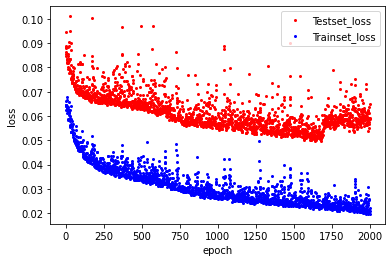

In [ ]:
# 그래프 확인을 위한 긴 학습.
history= model.fit(x_train, y_train, epochs= 2000, batch_size= 500, validation_split=.25)

# history에 저장된 학습 결과 확인.
hist_df= pd.DataFrame(history.history)
hist_df

# y_vloss에 검증셋의 오차를 저장.
y_vloss= hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장.
y_loss= hist_df['loss']

# x값을 지정하고 검증셋의 오차를 붉은색으로, 학습셋의 오차를 푸른색으로 표시.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c= "red", markersize= 2, label= 'Testset_loss')
plt.plot(x_len, y_loss, "o", c= "blue", markersize= 2, label= 'Trainset_loss')

plt.legend(loc= 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

학습의 자동 중단

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 학습이 언제 자동 중단될지 설정.
early_stooping_callback= EarlyStopping(monitor= 'val_loss', patience= 20)

# 최적화 모델이 저장될 폴더와 모델 이름 지정.
modelpath= './data/model/Ch14-4-bestmodel.hdf5'

# 최적화 모델을 업데이트 하고 저장.
# 'save_best_only=' 모델의 정확도가 최고값을 갱신했을 때만 저장
checkpointer= ModelCheckpoint(filepath= modelpath, monitor= 'val_loss', 
                              verbose= 0, save_best_only= True)

# 모델을 실행.
history= model.fit(x_train, y_train, epochs= 2000, batch_size= 500, 
                   validation_split=.25, verbose= 1, 
                   callbacks= [early_stooping_callback, checkpointer])

# 모델값 출력.
score= model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])

Epoch 1/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0193 - accuracy: 0.9954 - val_loss: 0.0607 - val_accuracy: 0.9900
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.0608 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9946 - val_loss: 0.0577 - val_accuracy: 0.9908
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0545 - val_accuracy: 0.9915
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9946 - val_loss: 0.0615 - val_accuracy: 0.9885
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 0.0609 - val_accuracy: 0.9892
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0530 - val_accuracy: 0.9915
Epoch 8/2000
8/8 